# Preparing Trainingsdata

## Loading Data

In [1]:
import pandas as pd
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# importiere das Dialog-design
with open('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/chat.json', encoding='UTF-8') as json_data:
    chat_data = json.load(json_data)["dialogflow"]


with open('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/validate.json', encoding='UTF-8') as json_data:
    validate_data = json.load(json_data)["tests"]


# Import Testdata
with open('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/testing.json', encoding='UTF-8') as json_data:
   test_data = json.load(json_data)["tests"]

In [4]:
# convert to dataframe
df = pd.json_normalize(chat_data, 'synonym', 'intent')
df.columns = ['utterances', 'intent']
df_validate = pd.json_normalize(validate_data, 'utterances', 'intent')

df_test = pd.json_normalize(test_data, 'utterances', 'intent')

In [5]:
len(df_validate)

123

In [6]:
len(df_test)

278

In [7]:
# merge dataframes
df_test = pd.concat([df_validate, df_test], ignore_index=True)
# rename columns
df_test.columns = ['utterances', 'intent']

In [8]:
df

,utterances,intent
0,Wie lege ich Objekte in der Navigation ab,navigation
1,Objekte in der Navigation hinzufügen,navigation
2,Wie kann ich Objekte in der Navigation platzieren,navigation
3,Dokument in den Favoriten hinzufügen,navigation
4,Wie kann ich Dokumente in den Favoriten ablegen,navigation
...,...,...
363,Was ist der Zweck des Eincheckens?,bedeutung_aus_einchecken
364,Warum ist das Einchecken so wichtig?,bedeutung_aus_einchecken
365,"Was bedeutet es, ein Dokument einzuchecken?",bedeutung_aus_einchecken
366,Was ist der Nutzen des Auscheckens von Dateien?,bedeutung_aus_einchecken


In [9]:
df_test

,utterances,intent
0,Objekte in Navigation,navigation
1,"Ich habe Schwierigkeiten, Objekte in der Navig...",navigation
2,Wie kann ich Objekte in der Navigation ablegen?,navigation
3,Was genau ist die Navigation?,navigation_usecase
4,Aufgabe der Navigation,navigation_usecase
...,...,...
396,Könntest du mir den Prozess zur Freigabe eines...,freigabe_von_dokumenten
397,Wie kann ich ein Dokument für andere Benutzer ...,freigabe_von_dokumenten
398,"Kannst du mir erklären, was Einchecken bedeutet?",bedeutung_aus_einchecken
399,"Ich verstehe nicht ganz, was Einchecken bedeut...",bedeutung_aus_einchecken


In [10]:
merged_df = pd.merge(df_test, df, how='outer', indicator=True)

# filter rows that are only in df1 ('left_only')
df_test = merged_df[merged_df['_merge'] == 'left_only']

In [11]:
merged_df

,utterances,intent,_merge
0,Objekte in Navigation,navigation,left_only
1,"Ich habe Schwierigkeiten, Objekte in der Navig...",navigation,left_only
2,"Ich habe Schwierigkeiten, Objekte in der Navig...",navigation,left_only
3,Wie kann ich Objekte in der Navigation ablegen?,navigation,left_only
4,Was genau ist die Navigation?,navigation_usecase,left_only
...,...,...,...
717,Was ist der Zweck des Eincheckens?,bedeutung_aus_einchecken,right_only
718,Warum ist das Einchecken so wichtig?,bedeutung_aus_einchecken,right_only
719,"Was bedeutet es, ein Dokument einzuchecken?",bedeutung_aus_einchecken,right_only
720,Was ist der Nutzen des Auscheckens von Dateien?,bedeutung_aus_einchecken,right_only


In [12]:
len(df_test)

330

In [13]:
df_test

,utterances,intent,_merge
0,Objekte in Navigation,navigation,left_only
1,"Ich habe Schwierigkeiten, Objekte in der Navig...",navigation,left_only
2,"Ich habe Schwierigkeiten, Objekte in der Navig...",navigation,left_only
3,Wie kann ich Objekte in der Navigation ablegen?,navigation,left_only
4,Was genau ist die Navigation?,navigation_usecase,left_only
...,...,...,...
396,Welche Vorgehensweise empfehlen Sie zur Wieder...,geloeschte_dokumente_wiederherstellen,left_only
397,Wie kann ich gelöschte Dokumente zurückgewinnen?,geloeschte_dokumente_wiederherstellen,left_only
398,Was sind die Möglichkeiten zur Wiederherstellu...,geloeschte_dokumente_wiederherstellen,left_only
399,Kann enaio Dokumente wiederherstellen,geloeschte_dokumente_wiederherstellen,left_only


In [14]:
# delete duplicates
df_test = df_test.drop_duplicates()

In [15]:
unsusedIntents= {'datenloeschen_akte',
 'kopieren_dokument_registeruebergreifend      ',
 'sammelaenderungen_durchfuehren',
 'vorlagen_erstellen'}

In [16]:
# Keep only the rows in df where 'intent' is not in 'intent_set'
df_test = df_test[~df_test['intent'].isin(unsusedIntents)]

In [17]:
len(df_test)

216

In [18]:
df_test = df_test.drop(columns='_merge')
df_test.columns = ['utterances', 'intent']

In [19]:
df

,utterances,intent
0,Wie lege ich Objekte in der Navigation ab,navigation
1,Objekte in der Navigation hinzufügen,navigation
2,Wie kann ich Objekte in der Navigation platzieren,navigation
3,Dokument in den Favoriten hinzufügen,navigation
4,Wie kann ich Dokumente in den Favoriten ablegen,navigation
...,...,...
363,Was ist der Zweck des Eincheckens?,bedeutung_aus_einchecken
364,Warum ist das Einchecken so wichtig?,bedeutung_aus_einchecken
365,"Was bedeutet es, ein Dokument einzuchecken?",bedeutung_aus_einchecken
366,Was ist der Nutzen des Auscheckens von Dateien?,bedeutung_aus_einchecken


In [20]:
len(df)

368

In [21]:
# delete duplicates
df = df.drop_duplicates()


In [22]:
len(df)

366

### Delete Adminfunktions

In [23]:
df = df[df.intent != 'datenloeschen_akte']
df = df[df.intent != 'sammelaenderungen_durchfuehren']
df = df[df.intent != 'vorlagen_erstellen']
df = df[df.intent != 'vorlagen_erstellen']


## Plotting data

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
intent_counts = df['intent'].value_counts()


In [25]:
def showData(_df):
  # create a bar plot
    # count the number of each intent
  plt.figure(figsize=(10, 6))
  sns.barplot(x= intent_counts.index, y=  intent_counts.values, palette="Blues_d")
  plt.title('Anzahl der Synomfragen pro Absicht')
  # plt.ylabel('Anzahl', fontsize=12)
  # plt.xlabel('Absichten', fontsize=12)
  # rotate x labels if they overlap
  plt.xticks(rotation=90)
  plt.show()


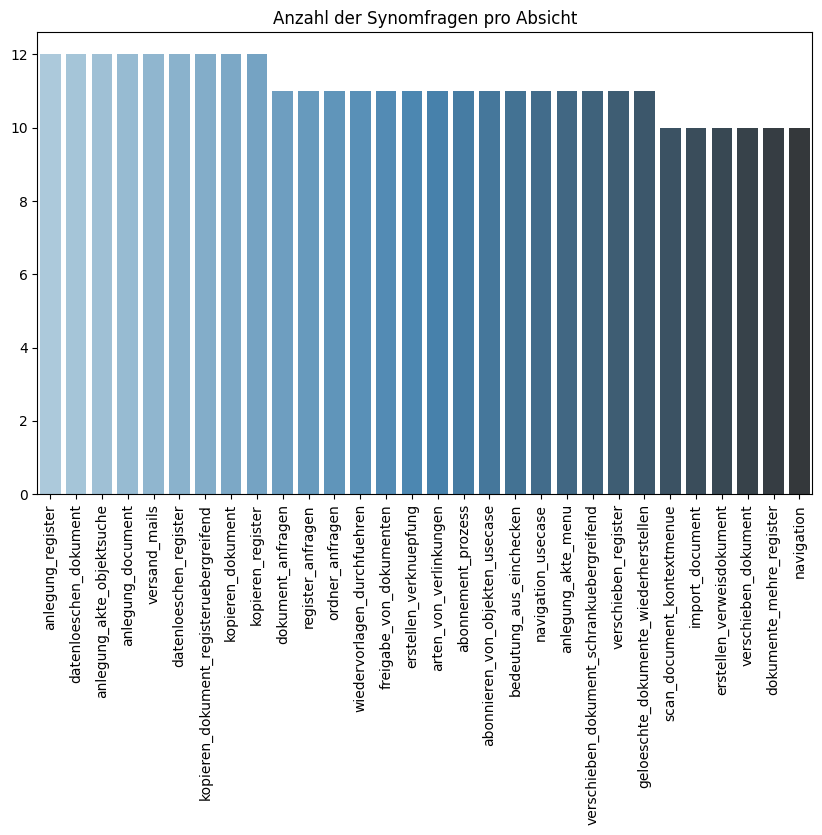

In [26]:
showData(df)

In [46]:
grouped_counts = intent_counts.value_counts().sort_index()
labels = [f"{index} Fragen pro Absicht" for index in grouped_counts.index]
grouped_counts


10     6
11    15
12     9
Name: intent, dtype: int64

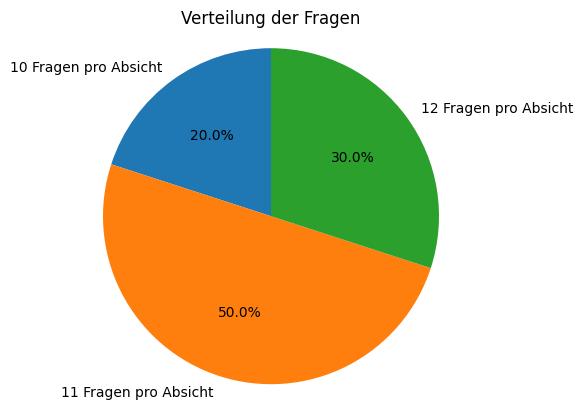

In [45]:
# Plot pie chart
plt.pie(grouped_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Fragen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# fig, ax = plt.subplots()
# ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'))
# ax.set_title('Tortendiagramm der Werte')
# ax.axis('equal')
# ax.legend(title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:
showData(df_test)

In [ ]:
df_test

In [ ]:
df_test = df_test[df_test.intent != 'kopieren_dokuemnt_registeruebergreifend']

## Preproces Data

In [ ]:
df.to_csv('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/train-without-Prep.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/test-without-Prep.csv', index=False)

### Delete Stopwords

In [ ]:
import nltk
from nltk.stem.snowball import GermanStemmer, SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
# Download the German stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words  = set(stopwords.words('german') + ['?', '.', ',']+ ["wie", "wo","wozu"])
# Create the German stemmer
stemmer = GermanStemmer()

In [ ]:
# Define your synonyms
synonyms = {
    'ordner': 'akte',
    'dateien': 'dokument',
    "vorgang": 'register'

}

In [ ]:
def preprocess(text):
    # Tokenize the text
    text = text.lower()
    words = nltk.word_tokenize(text)
    # Replace synonyms
    words = [synonyms.get(word, word) for word in words]

    # Remove stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)


In [ ]:
# Apply the preprocessing to the 'utterances' column
df['utterances'] = df['utterances'].apply(preprocess)

In [ ]:
df

## Saving datas

In [ ]:
# save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/train.csv', index=False)

In [ ]:
# save DataFrame to CSV
df_test.to_csv('/content/drive/MyDrive/1-Projekte/Bachelor-Arbeit/Train/test.csv', index=False)